# Notebook imports

In [5]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd # for dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split   # for training and testing data
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import boston_valuation as val

%matplotlib inline

# Gather Data
[Original source of data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [6]:
boston_dataset=load_boston()

In [7]:
type(boston_dataset)

sklearn.utils.Bunch

In [8]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [11]:
type(boston_dataset.data)

numpy.ndarray

In [12]:
boston_dataset.data.shape #chaning dot notation

(506, 13)

In [13]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston_dataset.target # actual vales in 000s 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas Dataframes

In [15]:
# Creating a pandas dataframes
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)


# Add Columns in data for prices(target)
data['PRICE'] = boston_dataset.target

In [16]:
# Getting glimes of our data
#data
data.head()  # Rows at top of the data
data.tail()  # Rows at the bootom of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [17]:
data.count()   # Show the number of rows in each columns

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data- Check for missing Values

In [18]:
# pd.isnull(data) for whole data
pd.isnull(data).any() # for checking all column

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualing Data- Histogram,Distribution and Bar Chats

In [ ]:
plt.figure(figsize=(10,6))


plt.hist(data['PRICE'], bins=50,ec='black')
plt.xlabel('Price in 000s')
plt.ylabel('No of Houses')

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,hist=True,kde=True,color='#fbc02d')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))


plt.hist(data['RM'],ec='black')
plt.xlabel('Average no.of rooms')
plt.ylabel('No of Houses')

plt.show()

In [ ]:
data["RM"].mean()

In [ ]:
plt.figure(figsize=(10,6))


plt.hist(data['RAD'],ec='black',bins=24,color='#7b1fa2',rwidth=.9)
plt.xlabel('Accesability toradial highways')
plt.ylabel('No of Houses')

plt.show()

In [ ]:
data['RAD'].value_counts()

In [ ]:
# Code used for index data


frequency=data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]   # axes attribute of series used to retives the rows axes labels
plt.figure(figsize=(10,6))
plt.xlabel('Accesability toradial highways')
plt.ylabel('No of Houses')
plt.bar(frequency.index, height=frequency)

plt.show()

In [ ]:
data['CHAS'].value_counts()

## Descriptive Statistics

In [ ]:
data['PRICE'].mean()

In [ ]:
data.median()

In [ ]:
data.describe()

## Correlation 
## $$\rho_{XY}=Corr(X,Y)$$
## $$-1.0\leq\rho_{XY}\leq+1.0$$


In [ ]:
data['PRICE'].corr(data['RM'])   ## Correlation against Rooms

In [ ]:
data['PRICE'].corr(data['PTRATIO'])  ## PTRATIO measures school Qualtiy or Education

In [ ]:
data.corr()  #Peason Correleation Coffecients

In [ ]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={'size':14})
# If passed(mask), data will not be shown in cells where ``mask`` is True.
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#Challege
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3) ## 3 for the precision after 0
plt.figure(figsize=(20,15))
plt.title(f'DIS vs NOX (Correlation{nox_dis_corr})',fontsize=14)  ## showing correlation in the graph
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=.6,s=80,color='indigo')
plt.xlabel('DIS distance from emplyemnet',fontsize=14)
plt.ylabel('NOX Nitric oxide pollution', fontsize=14)
plt.show()

In [ ]:
sns.set()
sns.set_context('notebook')


sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=9,color='indigo', joint_kws={'alpha':.5})  ## Scattering using seaborn
plt.show()

In [ ]:
sns.set()
sns.set_context('notebook')


sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='blue',kind='hex')  ## Scattering using seaborn
plt.show()

In [ ]:
## Now lets see what a prefect correlation looks like


sns.set()
sns.set_context('notebook')


sns.set_style('darkgrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],height=7,color='indigo', joint_kws={'alpha':.5})  ## Scattering using seaborn
plt.show()

In [ ]:
sns.lmplot(x='TAX', y='RAD',data=data, height=7)
plt.show()

In [ ]:
sns.lmplot(x='RM', y='PRICE',data=data, height=7)
plt.show()

In [ ]:
%%time


sns.pairplot(data)
plt.show()

In [ ]:
%%time
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split


In [ ]:
prices= data['PRICE']
features= data.drop('PRICE',axis=1)
X_train,X_test,Y_train,Y_test= train_test_split(features,prices,test_size=0.2,random_state=10)
# random_state  = Controls the shuffling applied to the data before applying the split.
# the % of the training set will be the number of row in X train divided by the total no of rows in the dataset in wholel
# we can calcluate the this function with the help of len function
#train_test_split=  Split arrays or matrices into random train and test subsets
len(X_train)/len(features)




In [ ]:
# the % of the test set will be the number of row in X test divided by the total no of rows in the dataset in whole
X_test.shape[0]/features.shape[0]



## Multivaribale Regression

In [ ]:
reg= LinearRegression()
reg.fit(X_train,Y_train)

# Printing out Rsquared values for training and test database
print('Training data r sqaured', reg.score(X_train,Y_train))
print('Training data r sqaured', reg.score(X_test,Y_test))

print('Intercept',reg.intercept_)
pd.DataFrame(data=reg.coef_,index=X_train.columns,columns=['coef'])

## Data  Transformation

In [ ]:
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])
y_log.tail()
y_log.skew()

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price wth skew{y_log.skew()}')
plt.show()

In [ ]:
sns.lmplot(x='LSTAT', y='PRICE', data= data,size=7,scatter_kws={'alpha':0.6})
plt.show()

In [ ]:
transformed_data= features
transformed_data['LOG PRICE']=y_log


In [ ]:
sns.lmplot(x='LSTAT',y='LOG PRICE',data=transformed_data,size=7,scatter_kws={'alpha':0.6},line_kws={'color':'cyan'})
plt.show()

## Regression using LOGprice

In [ ]:
prices= np.log(data['PRICE'])   # using log price
features=data.drop('PRICE',axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)
reg=LinearRegression()
reg.fit(x_train,y_train)

In [ ]:
# printing out r squared value
print('Training data r squared value',reg.score(x_train,y_train))
print('Testing data r squared value',reg.score(x_test,y_test))

In [ ]:
print('Intercept',reg.intercept_)
pd.DataFrame(data=reg.coef_,index=x_train.columns,columns=['coef'])

In [ ]:
np.e**0.008475

## p- value & Evaluating Coefficients

In [ ]:
# pvalues :- a regression cofficent vital state that tell us about the significance of cofficent


x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
model= sm.OLS(y_train,x_incl_const)  # Ordinary Least Squares

results=model.fit()
#results.params
#results.pvalues
pd.DataFrame({'coef':round(results.params,3),'p_values':round(results.pvalues,3)})


## Testing for Multicollinerity
$$ TAX=\alpha_0+\alpha_1 RM +\alpha_2 NOX+...+\alpha_{12}LSTAT $$
    $$  VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

In [ ]:
# VIF it measure of collinearity amonfg the feature within a multiple regression


variance_inflation_factor(exog=x_incl_const.values, exog_idx =1)
#type(x_incl_const)

In [ ]:
# Checking coloums in the model
#len(x_incl_const.columns)
x_incl_const.shape[1]

In [ ]:
# for calcultaing VIFs for all features
for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog= x_incl_const.values,exog_idx=i))
print('ALL DONE')

In [ ]:
vif=[] # emply list
for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog= x_incl_const.values,exog_idx=i))
print(vif)

In [ ]:
vif=[variance_inflation_factor(exog= x_incl_const.values,exog_idx=i) 
     for i in range(x_incl_const.shape[1]) ]


pd.DataFrame({'coef_name':x_incl_const.columns,'vif':np.around(vif,2)})

In [ ]:
import this


## Model Simplification and the Baysion Information Criterion (BIC)

In [ ]:
# BIC measure complexity  , it allow to compacre two model


# Original model with log prices and all features
x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
model= sm.OLS(y_train,x_incl_const)
results=model.fit()

org_coef = pd.DataFrame({'coef':round(results.params,3),'p_values':round(results.pvalues,3)})

print('BIC is',results.bic)

print(' R squared is ',results.rsquared)

In [ ]:
# Reduced  model  #1 excluding INDUS feature
x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
x_incl_const= x_incl_const.drop(['INDUS'],axis=1)



model= sm.OLS(y_train,x_incl_const)
results=model.fit()

coef_minus_indus = pd.DataFrame({'coef':round(results.params,3),'p_values':round(results.pvalues,3)})

print('BIC is',results.bic)

print(' R squared is ',results.rsquared)

In [ ]:
# Reduced  model #2  excluding INDUS and AGE feature
x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
x_incl_const= x_incl_const.drop(['INDUS','AGE'],axis=1)



model= sm.OLS(y_train,x_incl_const)
results=model.fit()

coef_minus_indus_age = pd.DataFrame({'coef':round(results.params,3),'p_values':round(results.pvalues,3)})

print('BIC is',results.bic)

print(' R squared is ',results.rsquared)

In [ ]:
frames=[org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames,axis=1)

## Residuals and Residuals Plots

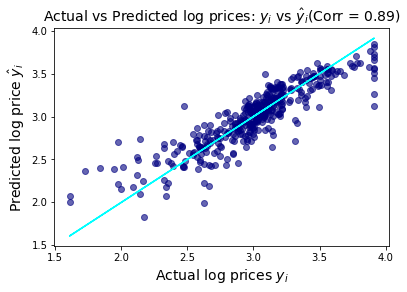

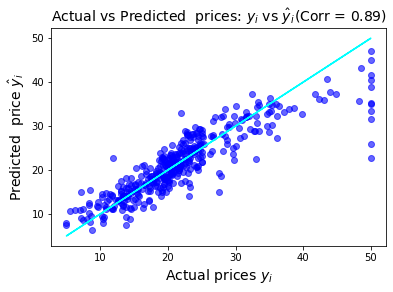

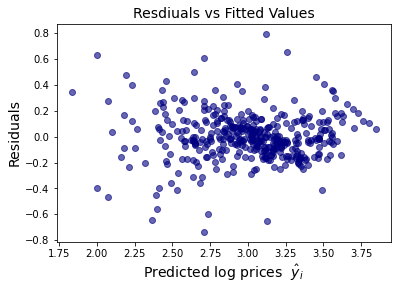

In [45]:
# Modified model transformed (using log prices)& simplified (dropping two features)


prices= np.log(data['PRICE'])   # using log price
features=data.drop(['PRICE','INDUS','AGE'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

# using stats model

x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
model= sm.OLS(y_train,x_incl_const)  # Ordinary Least Squares

results=model.fit()

# Residuals 
#residuals = y_train-results.fittedvalues
#residuals.describe
#results.resid

# graph of Actual vs pridicted prices

corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y = results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log price $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\haty_i$(Corr = {corr})' ,fontsize=14)
plt.show()
          

          
          
plt.scatter(x=np.e**y_train, y = np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.xlabel('Actual prices $y_i$', fontsize=14)
plt.ylabel('Predicted  price $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted  prices: $y_i$ vs $\haty_i$(Corr = {corr})' ,fontsize=14)
plt.show()



# REsidual vs Predicted Values



plt.scatter(x=results.fittedvalues, y = results.resid ,c='navy',alpha=0.6)

plt.xlabel('Predicted log prices  $\hat y_i$', fontsize=14)
plt.ylabel('Residuals' ,fontsize=14)
plt.title('Resdiuals vs Fitted Values',fontsize=14)
plt.show()

# Mean Square Error  & R squared
reduced_log_mse=round(results.mse_resid,3)
reduced_log_rsquared=round(results.rsquared,3)


C:\Users\GK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


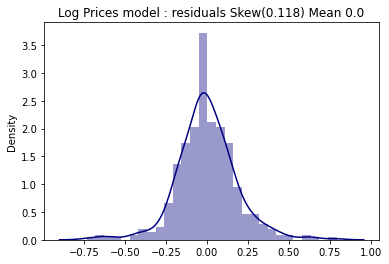

In [46]:
# Distribution of Residuals (log prices)- Checking for normality 
# Checking of normality is done by skew and mean of the features
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)




sns.distplot(results.resid, color='navy')
plt.title(f'Log Prices model : residuals Skew({resid_skew}) Mean {resid_mean}')
plt.show()

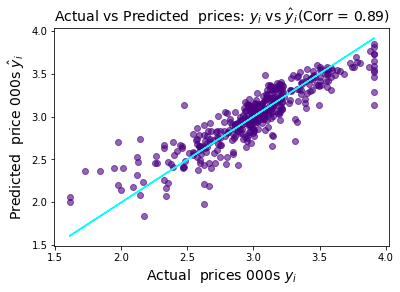

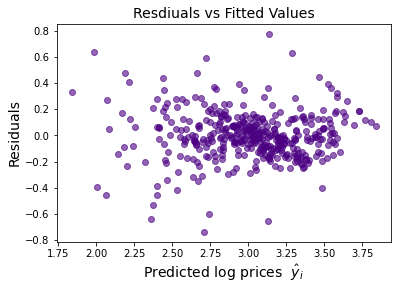

C:\Users\GK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


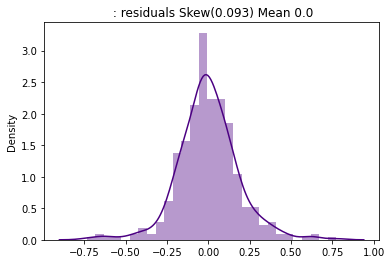

In [52]:
# Challenge Using the original model with all the features and normal price genrate

# Original model transformed (using normal prices)
price=data['PRICE']
features=data.drop(['PRICE'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

# using stats model

x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
model= sm.OLS(y_train,x_incl_const)  # Ordinary Least Squares

results=model.fit()



# graph of Actual vs pridicted prices

corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y = results.fittedvalues,c='indigo',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('Actual  prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted  price 000s $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted  prices: $y_i$ vs $\haty_i$(Corr = {corr})' ,fontsize=14)
plt.show()
    
# REsidual vs Predicted Values

plt.scatter(x=results.fittedvalues, y = results.resid ,c='indigo',alpha=0.6)

plt.xlabel('Predicted log prices  $\hat y_i$', fontsize=14)
plt.ylabel('Residuals' ,fontsize=14)
plt.title('Resdiuals vs Fitted Values',fontsize=14)
plt.show()

# Residual Distribution Charts
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)




sns.distplot(results.resid, color='indigo')
plt.title(f' : residuals Skew({resid_skew}) Mean {resid_mean}')
plt.show()


# Mean Square Error  & R squared
full_normal_mse=round(results.mse_resid,3)
full_normal_rsquared=round(results.rsquared,3)

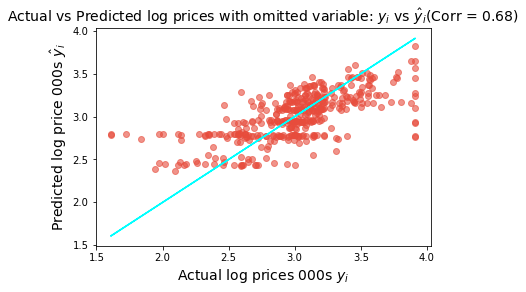

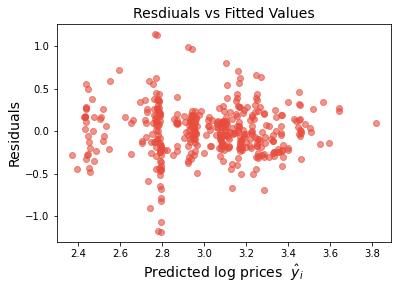

In [53]:
# Challenge Using the original model with all the features and normal price genrate

#  model ometting key feature (using log prices)
price=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

# using stats model

x_incl_const= sm.add_constant(x_train)  # Add a column of ones to an array.
model= sm.OLS(y_train,x_incl_const)  # Ordinary Least Squares

results=model.fit()



# graph of Actual vs pridicted prices

corr=round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y = results.fittedvalues,c='#e74c3c',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('Actual log prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted log price 000s $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices with omitted variable: $y_i$ vs $\haty_i$(Corr = {corr})' ,fontsize=14)
plt.show()
    
# REsidual vs Predicted Values

plt.scatter(x=results.fittedvalues, y = results.resid ,c='#e74c3c',alpha=0.6)

plt.xlabel('Predicted log prices  $\hat y_i$', fontsize=14)
plt.ylabel('Residuals' ,fontsize=14)
plt.title('Resdiuals vs Fitted Values',fontsize=14)
plt.show()


# Mean Square Error  & R squared
omitted_var_mse=round(results.mse_resid,3)
omitted_var_rsquared=round(results.rsquared,3)


In [55]:
pd.DataFrame({'Rsquared':[reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared],
              'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
             'RSME':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
             index=['Reduced log model','Full Normal Price Model','Omitted variable model'])

,Rsquared,MSE,RSME
Reduced log model,0.792,0.035,0.187083
Full Normal Price Model,0.793,0.035,0.187083
Omitted variable model,0.460,0.090,0.300000


In [64]:
# Challenge Our estimated for a house is $30,000. Calculate the upper and lower bound
# for a 95% prediction intervel using the reduced log model

print('1 s.d. in log price is ',np.sqrt(reduced_log_mse))
print('2 s.d. in log price is ',2*np.sqrt(reduced_log_mse))


upper_bound =np.log(30)+ 2*np.sqrt(reduced_log_mse)
print('the upper bound for 95% prediction is', upper_bound)
print('the upper bound for 95% prediction is', np.e**upper_bound)

lower_bound =np.log(30)- 2*np.sqrt(reduced_log_mse)
print('the lower bound for 95% prediction is', lower_bound)
print('the lower bound for 95% prediction is', np.e**lower_bound)

1 s.d. in log price is  0.18708286933869708
2 s.d. in log price is  0.37416573867739417
the upper bound for 95% prediction is 3.7753631203395495
the upper bound for 95% prediction is 43.61334233239937
the lower bound for 95% prediction is 3.0270316429847615
the lower bound for 95% prediction is 20.635886906824155


In [2]:
val.get_dollor_estimate(8,15,False)

Estimated Value 755000.0
Upper range 1099000.0
Lower range 519000.0
